Masterproject David Degen:

compare different scaling methods

In [1]:
import pandas as pd
import numpy as np
from helper_functions.preprocessing import no_path_find_pre
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import re

In [11]:
# automatically
train_data_obs, train_data_stat, test_data_obs, test_data_stat = no_path_find_pre(dat_set_choice=1, pre_choice=9)

Available Data sets:
{0: 'phase_function_dfs', 1: 'raw_data'}
raw_data was chosen.
From the preprocessings:
{0: 'pre_ts-0.2_P11_wl-532_sc-None_11_36', 1: 'pre_ts-0.2_P11_wl-532_sc-None_11_28', 2: 'pre_ts-0.2_P11_wl-532_sc-None', 3: 'pre_ts-0.2_P11_wl-532_sc-None_10_11', 4: 'pre_log_ts-0.2_P11_wl-532', 5: 'pre_log_ts-0.2_P11_wl-532_sc-None', 6: 'pre_log_ts-0.2_wl-532', 7: 'pre_ts-0.2_P11_wl-532_sc-None_11_49', 8: 'pre_relErr-0.05_log_ts-0.2_P11_wl-532_09_08', 9: 'pre_ts-0.2_P11_sc-None', 10: 'pre_ts-0.2_P11_wl-532_sc-None_11_40', 11: 'pre_ts-0.2_P11_wl-532_sc-None_11_50'}
pre_ts-0.2_P11_sc-None was chosen.
Matched the following data sets:
Training data: training_dataset.hdf5
Test data: test_dataset.hdf5
Command executed:
pd.read_hdf("/data/user/boiger_r/aerosol/aerosol_data/raw_data//pre_ts-0.2_P11_sc-None/training_dataset.hdf5", key='dvar')


In [12]:
#pre_ts-0.2_P11_sc-None

In [13]:
train_data_obs

P11_0.450_5   P11_0.450_6   P11_0.450_7   P11_0.450_8   P11_0.450_9  \
75220  1.914700e-07  1.103000e-07  6.404900e-08  3.853200e-08  2.443700e-08   
48955  4.906300e-07  3.525900e-07  2.471500e-07  1.705600e-07  1.169800e-07   
44966  4.101800e-08  2.079500e-08  1.136100e-08  6.948500e-09  4.674400e-09   
13568  1.695900e-07  1.113900e-07  7.159500e-08  4.573800e-08  2.951200e-08   
92727  5.192400e-07  4.479300e-07  3.798800e-07  3.176900e-07  2.627300e-07   
...             ...           ...           ...           ...           ...   
6265   9.187300e-08  4.731700e-08  2.676600e-08  1.711200e-08  1.205300e-08   
54886  2.102000e-07  1.191600e-07  6.950200e-08  4.320100e-08  2.915200e-08   
76820  1.381900e-07  7.365400e-08  4.070700e-08  2.425500e-08  1.573700e-08   
860    3.300100e-07  2.051700e-07  1.272300e-07  8.057800e-08  5.324500e-08   
15795  3.218300e-07  3.142500e-07  3.056100e-07  2.960400e-07  2.856900e-07   

       P11_0.450_10  P11_0.450_11  P11_0.450_12  P11_0.450_13  P11_0.450_14  \
75220  1.664900e-08  1.196200e-08  9.068300e-09  7.032800e-09  5.838800e-09   
48955  8.049200e-08  5.597700e-08  3.981800e-08  2.853900e-08  2.189600e-08   
44966  3.448300e-09  2.631800e-09  2.062800e-09  1.647400e-09  1.367300e-09   
13568  1.955900e-08  1.341300e-08  9.656700e-09  7.125300e-09  5.711400e-09   
92727  2.154200e-07  1.755500e-07  1.425300e-07  1.142400e-07  9.366000e-08   
...             ...           ...           ...           ...           ...   
6265   9.225900e-09  7.335500e-09  5.998000e-09  5.043700e-09  4.332200e-09   
54886  2.146500e-08  1.684000e-08  1.391700e-08  1.186800e-08  1.042700e-08   
76820  1.121700e-08  8.395400e-09  6.554200e-09  5.212900e-09  4.359000e-09   
860    3.737400e-08  2.782000e-08  2.194600e-08  1.825400e-08  1.555600e-08   
15795  2.747000e-07  2.632100e-07  2.513700e-07  2.387800e-07  2.271400e-07   

       ...  P11_0.630_166  P11_0.630_167  P11_0.630_168  P11_0.630_169  \
75220  ...   5.753000e-11   5.806800e-11   5.766700e-11   5.619000e-11   
48955  ...   1.124700e-09   1.067200e-09   9.857000e-10   8.862000e-10   
44966  ...   1.265900e-11   1.270100e-11   1.264800e-11   1.249500e-11   
13568  ...   1.320200e-10   1.253900e-10   1.169300e-10   1.075100e-10   
92727  ...   1.007300e-09   9.445400e-10   8.778500e-10   8.114600e-10   
...    ...            ...            ...            ...            ...   
6265   ...   8.176900e-10   9.076800e-10   9.987500e-10   1.092600e-09   
54886  ...   2.670900e-09   2.990300e-09   3.301800e-09   3.598400e-09   
76820  ...   3.977900e-11   3.956600e-11   3.927300e-11   3.893400e-11   
860    ...   2.860600e-09   2.935400e-09   2.975100e-09   2.987100e-09   
15795  ...   9.743900e-10   9.766800e-10   9.796600e-10   9.831900e-10   

       P11_0.630_170  P11_0.630_171  P11_0.630_172  P11_0.630_173  \
75220   5.369500e-11   5.046900e-11   4.701100e-11   4.394200e-11   
48955   7.784000e-10   6.747200e-10   5.886700e-10   5.326400e-10   
44966   1.225600e-11   1.197000e-11   1.169000e-11   1.147900e-11   
13568   9.826800e-11   9.047800e-11   8.534200e-11   8.379600e-11   
92727   7.501900e-10   6.989100e-10   6.618300e-10   6.417600e-10   
...              ...            ...            ...            ...   
6265    1.171800e-09   1.224500e-09   1.247100e-09   1.215300e-09   
54886   3.835300e-09   3.970000e-09   3.987000e-09   3.861600e-09   
76820   3.859300e-11   3.830100e-11   3.810700e-11   3.804700e-11   
860     2.964500e-09   2.886500e-09   2.753100e-09   2.568600e-09   
15795   9.871600e-10   9.914000e-10   9.957600e-10   1.000100e-09   

       P11_0.630_174  P11_0.630_175  
75220   4.185200e-11   4.112400e-11  
48955   5.149900e-10   5.372700e-10  
44966   1.138600e-11   1.143600e-11  
13568   8.626800e-11   9.248500e-11  
92727   6.393000e-10   6.524400e-10  
...              ...            ...  
6265    1.120800e-09   9.681900e-10  
54886   3.615900e-09   3.318900e-09  
76820   3.813300e-11   3.835300e-11  
860     2.36

In [14]:
def normalization_paper(U):
    # Y = U/(U_bar*np.average(U, axis=1)[:, None])  # correct
    Normalized_per_angle = np.average(U, axis=0)
    Normalized_per_sample = U/(np.average(U, axis=1))[:, None]
    Y = Normalized_per_sample/Normalized_per_angle
    return Y, Normalized_per_angle


def normalization_test_paper(U, Normalized_per_angle):
    # Y = U/(U_bar*np.average(U, axis=1)[:, None])  # correct
    Normalized_per_sample = U/(np.average(U, axis=1))[:, None]
    Y = Normalized_per_sample/Normalized_per_angle
    return Y

In [15]:
def normalization(U):
    # Y = U/(U_bar*np.average(U, axis=1)[:, None])  # correct
    Normalized_per_sample = U/(np.average(U, axis=1))[:, None]
    Normalized_per_angle = np.average(Normalized_per_sample, axis=0)
    Y = Normalized_per_sample/Normalized_per_angle
    return Y, Normalized_per_angle


def normalization_test(U, Normalized_per_angle):
    # Y = U/(U_bar*np.average(U, axis=1)[:, None])  # correct
    Normalized_per_sample = U/(np.average(U, axis=1))[:, None]
    Y = Normalized_per_sample/Normalized_per_angle
    return Y

In [16]:

def normalize_by_max_and_log(U):
    
    Normalized_by_max_val = U/np.max(U,axis = 1)[:,None]
    Y = np.log(Normalized_by_max_val)
    return Y
    

In [17]:
R_raw = train_data_stat.iloc[:, :]

In [18]:
# Seperate
# Training data
obs_450 = train_data_obs.loc[:, list(train_data_obs.filter(regex='0.450', axis=1))].to_numpy()
obs_532 = train_data_obs.loc[:, list(train_data_obs.filter(regex='0.532', axis=1))].to_numpy()
obs_630 = train_data_obs.loc[:, list(train_data_obs.filter(regex='0.630', axis=1))].to_numpy()
R_raw = train_data_stat.iloc[:, :]
R_450 = R_raw.loc[:, ["R_median", "n_450nm", "k_450nm"]].to_numpy()
R_532 = R_raw.loc[:, ["R_median", "n_532nm", "k_532nm"]].to_numpy()
R_630 = R_raw.loc[:, ["R_median", "n_630nm", "k_630nm"]].to_numpy()

# Testing data
t_obs_450 = test_data_obs.loc[:, list(test_data_obs.filter(regex='0.450', axis=1))].to_numpy()
t_obs_532 = test_data_obs.loc[:, list(test_data_obs.filter(regex='0.532', axis=1))].to_numpy()
t_obs_630 = test_data_obs.loc[:, list(test_data_obs.filter(regex='0.630', axis=1))].to_numpy()
t_R_raw = test_data_stat.iloc[:, :]
t_R_450 = t_R_raw.loc[:, ["R_median", "n_450nm", "k_450nm"]].to_numpy()
t_R_532 = t_R_raw.loc[:, ["R_median", "n_532nm", "k_532nm"]].to_numpy()
t_R_630 = t_R_raw.loc[:, ["R_median", "n_630nm", "k_630nm"]].to_numpy()





Y_450, npa_450 = normalization(obs_450)
Y_532, npa_532 = normalization(obs_532)
Y_630, npa_630 = normalization(obs_630)

Y_450_p, npa_450 = normalization_paper(obs_450)
Y_532_p, npa_532 = normalization_paper(obs_532)
Y_630_p, npa_630 = normalization_paper(obs_630)

In [19]:
Y_450_log, npa_450_log = normalization(np.log(obs_450))
Y_532_log, npa_532_log = normalization(np.log(obs_532))
Y_630_log, npa_630_log = normalization(np.log(obs_630))

Y_450_p_log, npa_450_log = normalization_paper(np.log(obs_450))
Y_532_p_log, npa_532_log = normalization_paper(np.log(obs_532))
Y_630_p_log, npa_630_log = normalization_paper(np.log(obs_630))




Y_450_maxlog = normalize_by_max_and_log(obs_450)
Y_532_maxlog = normalize_by_max_and_log(obs_532)
Y_630_maxlog = normalize_by_max_and_log(obs_630)

Y_450_maxlog_n = normalization(Y_450_maxlog)
Y_532_maxlog_n = normalization(Y_532_maxlog)
Y_630_maxlog_n = normalization(Y_630_maxlog)


/data/user/boiger_r/python_env/aerosol_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [20]:
column_names = [re.sub('0.532_', '', c_name) for c_name in list(train_data_obs.loc[:, list(train_data_obs.filter(regex='0.532', axis=1))].columns)]
column_names = [re.sub('P11_', '', c_name) for c_name in column_names]
columns = [int(i) for i in column_names]

In [21]:
[re.sub('0.532_', '', c_name) for c_name in list(train_data_obs.loc[:, list(train_data_obs.filter(regex='0.532', axis=1))].columns)]

['P11_5',
 'P11_6',
 'P11_7',
 'P11_8',
 'P11_9',
 'P11_10',
 'P11_11',
 'P11_12',
 'P11_13',
 'P11_14',
 'P11_15',
 'P11_16',
 'P11_17',
 'P11_18',
 'P11_19',
 'P11_20',
 'P11_21',
 'P11_22',
 'P11_23',
 'P11_24',
 'P11_25',
 'P11_26',
 'P11_27',
 'P11_28',
 'P11_29',
 'P11_30',
 'P11_31',
 'P11_32',
 'P11_33',
 'P11_34',
 'P11_35',
 'P11_36',
 'P11_37',
 'P11_38',
 'P11_39',
 'P11_40',
 'P11_41',
 'P11_42',
 'P11_43',
 'P11_44',
 'P11_45',
 'P11_46',
 'P11_47',
 'P11_48',
 'P11_49',
 'P11_50',
 'P11_51',
 'P11_52',
 'P11_53',
 'P11_54',
 'P11_55',
 'P11_56',
 'P11_57',
 'P11_58',
 'P11_59',
 'P11_60',
 'P11_61',
 'P11_62',
 'P11_63',
 'P11_64',
 'P11_65',
 'P11_66',
 'P11_67',
 'P11_68',
 'P11_69',
 'P11_70',
 'P11_71',
 'P11_72',
 'P11_73',
 'P11_74',
 'P11_75',
 'P11_76',
 'P11_77',
 'P11_78',
 'P11_79',
 'P11_80',
 'P11_81',
 'P11_82',
 'P11_83',
 'P11_84',
 'P11_96',
 'P11_97',
 'P11_98',
 'P11_99',
 'P11_100',
 'P11_101',
 'P11_102',
 'P11_103',
 'P11_104',
 'P11_105',
 'P11_106

TypeError: tuple indices must be integers or slices, not tuple

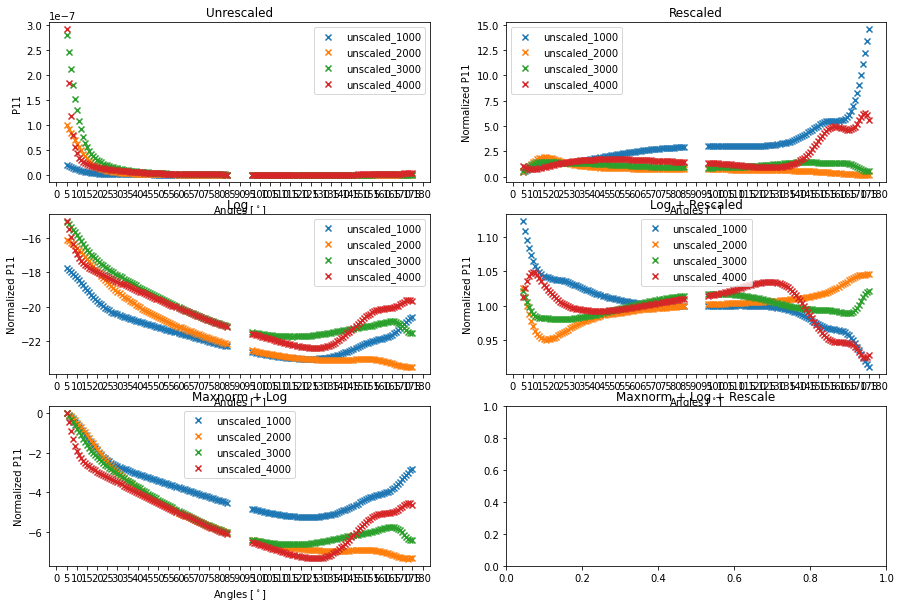

In [22]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(321)
ax1.set_title("Unrescaled")
for i in range(1,5):
    ax1.scatter(columns, obs_532[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax1.set_xlabel("Angles [$^\circ$]")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.set_ylabel("P11")
ax1.legend()
ax2 = fig.add_subplot(322)
ax2.set_title("Rescaled")
for i in range(1,5):
    ax2.scatter(columns, Y_532[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax2.set_xlabel("Angles [$^\circ$]")
ax2.locator_params(axis = 'x', tight=True, nbins=40)
ax2.set_ylabel("Normalized P11")
ax2.legend()
ax3 = fig.add_subplot(324)
ax3.set_title("Log + Rescaled")
for i in range(1,5):
    ax3.scatter(columns, Y_532_log[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax3.set_xlabel("Angles [$^\circ$]")
ax3.locator_params(axis = 'x', tight=True, nbins=40)
ax3.set_ylabel("Normalized P11")
ax3.legend()
ax4 = fig.add_subplot(323)
ax4.set_title("Log ")
for i in range(1,5):
    ax4.scatter(columns, np.log(obs_532[1+i*1000, :]), label=f'unscaled_{i*1000}', marker='x')
ax4.set_xlabel("Angles [$^\circ$]")
ax4.locator_params(axis = 'x', tight=True, nbins=40)
ax4.set_ylabel("Normalized P11")
ax4.legend()
ax5 = fig.add_subplot(325)
ax5.set_title("Maxnorm + Log")
for i in range(1,5):
    ax5.scatter(columns, Y_532_maxlog[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax5.set_xlabel("Angles [$^\circ$]")
ax5.locator_params(axis = 'x', tight=True, nbins=40)
ax5.set_ylabel("Normalized P11")
ax5.legend()
ax6 = fig.add_subplot(326)
ax6.set_title("Maxnorm + Log + Rescale")
for i in range(1,5):
    ax6.scatter(columns, Y_532_maxlog_n[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax6.set_xlabel("Angles [$^\circ$]")
ax6.locator_params(axis = 'x', tight=True, nbins=40)
ax6.set_ylabel("Normalized P11")
ax6.legend()
plt.show()

In [23]:
print("log + normalized: ", [np.min(Y_532_log),np.max(Y_532_log)])
print("normalized: ", [np.min(Y_532),np.max(Y_532)])
print("unnormalized: ", [np.min(obs_532), np.max(obs_532)])

log + normalized:  [0.8867676262842955, 1.2186510593640236]
normalized:  [0.09911954943155868, 16.747037442342204]
unnormalized:  [1.7255e-14, 6.9304e-07]


In [24]:
print("range normalized: ", f'{np.min(Y_532_log)/np.max(Y_532_log):.1E}')
print("range normalized: ", f'{np.min(Y_532)/np.max(Y_532):.1E}')
print("range unnormalized: ", f'{np.min(obs_532)/np.max(obs_532):.1E}')

range normalized:  7.3E-01
range normalized:  5.9E-03
range unnormalized:  2.5E-08


Difference between rescalings

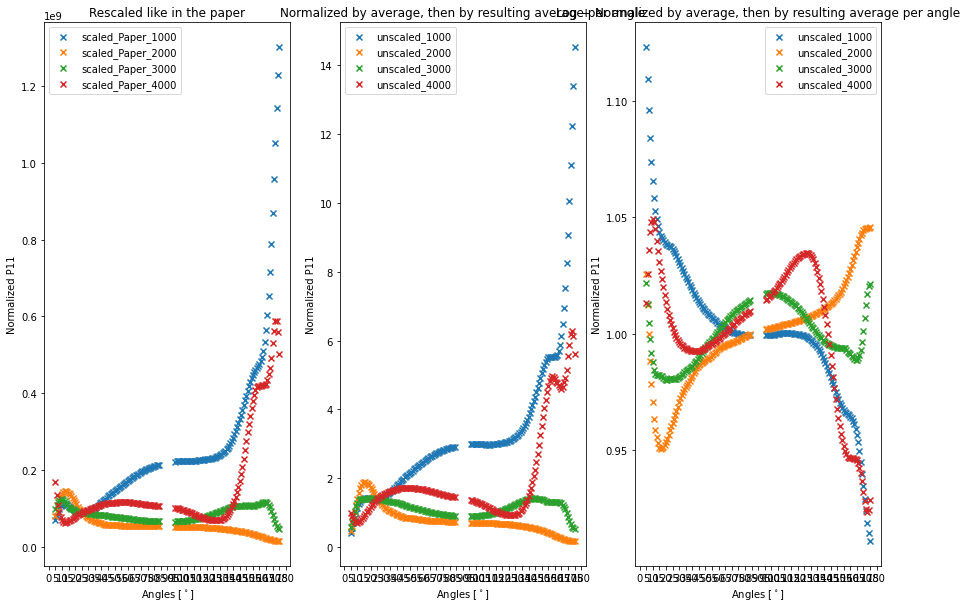

In [25]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(131)
ax1.set_title("Rescaled like in the paper")
for i in range(1,5):
    ax1.scatter(columns, Y_532_p[1+i*1000, :], label=f'scaled_Paper_{i*1000}', marker='x')
ax1.set_xlabel("Angles [$^\circ$]")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.set_ylabel("Normalized P11")
ax1.legend()
ax2 = fig.add_subplot(132)
ax2.set_title("Normalized by average, then by resulting average per angle")
for i in range(1,5):
    ax2.scatter(columns, Y_532[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax2.set_xlabel("Angles [$^\circ$]")
ax2.locator_params(axis = 'x', tight=True, nbins=40)
ax2.set_ylabel("Normalized P11")
ax2.legend()
ax3 = fig.add_subplot(133)
ax3.set_title("Log + Normalized by average, then by resulting average per angle")
for i in range(1,5):
    ax3.scatter(columns, Y_532_log[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax3.set_xlabel("Angles [$^\circ$]")
ax3.locator_params(axis = 'x', tight=True, nbins=40)
ax3.set_ylabel("Normalized P11")
ax3.legend()


plt.show()

By MinMaxScalar

In [26]:
scaler0 = MinMaxScaler()
obs_532_mms = scaler0.fit_transform(obs_532)

scaler1 = MinMaxScaler()
Y_532_mms = scaler1.fit_transform(Y_532)

scaler2 = MinMaxScaler()
Y_532_log_mms = scaler2.fit_transform(Y_532_log)


By StandardScaler

In [27]:
scaler3 = StandardScaler()
obs_532_sts = scaler3.fit_transform(obs_532)

scaler4 = StandardScaler()
Y_532_sts = scaler4.fit_transform(Y_532)

scaler5 = StandardScaler()
Y_532_log_sts = scaler5.fit_transform(Y_532_log)

In view of the fact that the means are squished down so closely to the lower limit, zero, it might is probably advantageous to use the StandardScaler instead.

In [28]:
print("Unnormalized_MMS:", np.mean(obs_532_mms), np.var(obs_532_mms))
print("Normalized_MMS:", np.mean(Y_532_mms), np.var(Y_532_mms))
print("Log + Normalized_MMS:", np.mean(Y_532_log_mms), np.var(Y_532_log_mms))

Unnormalized_MMS: 0.0531905611785311 0.01052319725325968
Normalized_MMS: 0.16943072735542544 0.04234944134662926
Log + Normalized_MMS: 0.5467063952767958 0.036602975811933176


For the standardscaler we now have outliners reaching outliners several standarddeviations away. 

In [29]:
print("Normalized_STS: ", [np.min(Y_532_sts),np.max(Y_532_sts)])
print("Unnormalized_STS: ", [np.min(obs_532_sts), np.max(obs_532_sts)])
print("Log + Normalized_STS: ", [np.min(Y_532_log_sts), np.max(Y_532_log_sts)])


Normalized_STS:  [-3.005869560030917, 10.778398646916628]
Unnormalized_STS:  [-1.5251620099352388, 19.335842894318205]
Log + Normalized_STS:  [-5.036862053270322, 5.4839675738493865]


In [ ]:
#fig = plt.figure(figsize=(15, 10), constrained_layout=True)
#fig, [ax1, ax2, ax3] = plt.subplots(figsize=(15, 15), ncols=1, nrows=3, constrained_layout=True)
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(321)
ax1.set_title("MinMaxScaler only")
for i in range(1,5):
    ax1.scatter(columns, obs_532_mms[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax1.set_xlabel("Angles [$^\circ$]")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.set_ylabel("P11")
ax1.legend()
ax2 = fig.add_subplot(323)
ax2.set_title("MinMaxScaler + normalization")
for i in range(1,5):
    ax2.scatter(columns, Y_532_mms[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax2.set_xlabel("Angles [$^\circ$]")
ax2.locator_params(axis = 'x', tight=True, nbins=40)
ax2.set_ylabel("Normalized P11 MMS")
ax2.legend()
ax3 = fig.add_subplot(325)
ax3.set_title("MinMaxScaler + standardization")
for i in range(1,5):
    ax3.scatter(columns, Y_532_sts[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax3.set_xlabel("Angles [$^\circ$]")
ax3.locator_params(axis = 'x', tight=True, nbins=40)
ax3.set_ylabel("Normalized P11 StS")
ax3.legend()
ax4 = fig.add_subplot(324)
ax4.set_title("Log + MinMaxScaler + normalization")
for i in range(1,5):
    ax4.scatter(columns, Y_532_log_mms[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax4.set_xlabel("Angles [$^\circ$]")
ax4.locator_params(axis = 'x', tight=True, nbins=40)
ax4.set_ylabel("Normalized P11 MMS")
ax4.legend()

ax6 = fig.add_subplot(326)
ax6.set_title("Log + MinMaxScaler + standardization")
for i in range(1,5):
    ax6.scatter(columns, Y_532_log_sts[1+i*1000, :], label=f'unscaled_{i*1000}', marker='x')
ax6.set_xlabel("Angles [$^\circ$]")
ax6.locator_params(axis = 'x', tight=True, nbins=40)
ax6.set_ylabel("Normalized P11 StS")

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax1.set_title("Co")
for i in range(5,8):
    ax1.scatter(columns, obs_532_mms[1+i, :], label=f'unscaled_{i}', marker='x')
ax1.set_xlabel("Angles [$^\circ$]")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.set_ylabel("P11")
ax1.legend()
ax2 = fig.add_subplot(122)
ax2.set_title("CL")
for i in range(5,8):
    ax2.scatter(columns, Y_532_mms[1+i, :], label=f'unscaled_{i}', marker='x')
ax2.set_xlabel("Angles [$^\circ$]")
ax2.locator_params(axis = 'x', tight=True, nbins=40)
ax2.set_ylabel("Normalized P11")
ax2.legend()
plt.show()